# Day 20: Donut Maze

https://adventofcode.com/2019/day/20#part2

## Part 1

In [182]:
import numpy as np
import matplotlib.pyplot as plt
from queue import Queue

In [300]:
#inputfile = "./data/day20test1.txt"
#inputfile = "./data/day20test2.txt"
inputfile = "./data/input20.txt"

with open(inputfile) as f:
    amaze = [l.rstrip('\n') for l in f]
    
amaze

['                               H       I       J   D A       U     U       W                               ',
 '                               R       Z       M   S A       N     V       T                               ',
 '  #############################.#######.#######.###.#.#######.#####.#######.#############################  ',
 '  #.#...#.#.......#.#...#...#.........#.#.#.......#.#.....#.....#.....#.....#.............#...#.....#...#  ',
 '  #.###.#.###.#####.###.###.###.#####.#.#.#######.#.#.###.#.#####.#.###.###.###.#############.#.#.#####.#  ',
 '  #...#.#...#.#...............#...#...#...#.......#.....#.#.#.#...#.#.#.#.#.....#...#...#.#.#...#.#.....#  ',
 '  #.###.#.###.#####.#####.###.#####.###.###.#####.###.#.#.#.#.#.#.###.#.#.###.#####.###.#.#.#.#####.#####  ',
 '  #.#...........#...#...#.#.......#...#...#.....#.#...#.#.#...#.#.....#.....#.#.........#.......#.#.....#  ',
 '  #.###########.###.#.#.###.###.#.###.#.#####.#####.#####.#.#.#######.#.#####.#.#.#.#######.#####.#.#.

In [184]:
def getAdjacentBorder(n,xmax,ymax):
    '''returns list of adiacent cells'''
    x,y = n
    adj = []
    if x>=1: adj.append((x-1,y)) # W
    if y>=1: adj.append((x,y-1)) # N
    if x<xmax-1: adj.append((x+1,y)) # E
    if y<ymax-1: adj.append((x,y+1)) # S
    return adj    

def getEntrance(portalList):
    for c in portalList:
        for cc in getAdjacentBorder(c,len(amaze[0]),len(amaze)):
            x, y = cc
            ccc = amaze[y][x]
            if ccc=='.':
                return c

def findPortals(amaze):
    '''Identify and process portal positions'''
    portals = []
    j = 0
    for l in amaze:
        i = 0
        for c in l:
            if not (c=='#' or c==' ' or c=='.'): # found a portal letter
                n = (i,j)
                for a in getAdjacentBorder(n,len(amaze[0]),len(amaze)):
                    x, y = a
                    cc = amaze[y][x]
                    if not cc=='#' and not cc==' ' and not cc=='.':
                        portalName = ''.join(sorted(c+cc))
                        portalCoord = sorted([n,a])
                        portal = ( portalName, portalCoord )
                        if portal in portals:
                            continue
                        portals.append(portal)                                 
            i+=1
        j+=1
    portals.sort(key=lambda tup: tup[0]) # sort portals by name
    _start = portals[0]
    _exit = portals[-1]
    start = (0,0)
    exit = (0,0)
    # reformat start and exit
    for cell in _start[1]:
        if len(getAdjacentBorder(cell,len(amaze[0]),len(amaze)))==4:
            start = cell
    for cell in _exit[1]:
        if len(getAdjacentBorder(cell,len(amaze[0]),len(amaze)))==4:
            exit = cell
    # link portal extremes
    portals = portals[1:len(portals)-1]
    i = 0
    P = {}
    Plink = {}
    while i<len(portals):
        name = portals[i][0]
        IN = getEntrance(portals[i][1])
        OUT = getEntrance(portals[i+1][1])
        P[name] = [IN,OUT]
        Plink[IN] = OUT
        Plink[OUT] = IN
        i+=2
    return start, exit, P, Plink

# Find first walkable tile near to start and exit labels, since only '.' tiles are part of the path

def findWalkable(start,amaze):
    theStart = start
    for c in (getAdjacentBorder(start,len(amaze[0]),len(amaze))):
        x,y = c
        if amaze[y][x]==".":
            theStart = c
            return theStart

In [299]:
start, exit, P, Plink = findPortals(amaze)

theStart = findWalkable(start,amaze)
theExit = findWalkable(exit,amaze)
        
print(start,exit)
print(theStart,theExit)
print(P)
print(Plink)
P

(53, 1) (105, 63)
(53, 2) (104, 63)
{'AB': [(67, 81), (59, 107)], 'AY': [(33, 27), (63, 107)], 'BT': [(27, 43), (1, 67)], 'DH': [(61, 27), (35, 107)], 'DQ': [(105, 75), (49, 81)], 'DS': [(51, 1), (75, 81)], 'EL': [(79, 71), (49, 107)], 'FU': [(105, 69), (27, 71)], 'GU': [(71, 27), (39, 107)], 'HO': [(1, 47), (27, 67)], 'HR': [(31, 1), (27, 57)], 'HS': [(1, 59), (31, 81)], 'HZ': [(39, 27), (1, 35)], 'IZ': [(39, 1), (27, 51)], 'JM': [(47, 1), (79, 63)], 'LU': [(45, 27), (1, 69)], 'LY': [(105, 43), (27, 49)], 'MM': [(1, 51), (55, 81)], 'MZ': [(79, 31), (105, 53)], 'NU': [(61, 1), (79, 75)], 'OU': [(55, 27), (1, 43)], 'PY': [(79, 49), (105, 67)], 'QV': [(105, 35), (79, 39)], 'QW': [(79, 53), (73, 107)], 'TW': [(75, 1), (27, 39)], 'UV': [(67, 1), (39, 81)]}
{(67, 81): (59, 107), (59, 107): (67, 81), (33, 27): (63, 107), (63, 107): (33, 27), (27, 43): (1, 67), (1, 67): (27, 43), (61, 27): (35, 107), (35, 107): (61, 27), (105, 75): (49, 81), (49, 81): (105, 75), (51, 1): (75, 81), (75, 81): (

{'AB': [(67, 81), (59, 107)],
 'AY': [(33, 27), (63, 107)],
 'BT': [(27, 43), (1, 67)],
 'DH': [(61, 27), (35, 107)],
 'DQ': [(105, 75), (49, 81)],
 'DS': [(51, 1), (75, 81)],
 'EL': [(79, 71), (49, 107)],
 'FU': [(105, 69), (27, 71)],
 'GU': [(71, 27), (39, 107)],
 'HO': [(1, 47), (27, 67)],
 'HR': [(31, 1), (27, 57)],
 'HS': [(1, 59), (31, 81)],
 'HZ': [(39, 27), (1, 35)],
 'IZ': [(39, 1), (27, 51)],
 'JM': [(47, 1), (79, 63)],
 'LU': [(45, 27), (1, 69)],
 'LY': [(105, 43), (27, 49)],
 'MM': [(1, 51), (55, 81)],
 'MZ': [(79, 31), (105, 53)],
 'NU': [(61, 1), (79, 75)],
 'OU': [(55, 27), (1, 43)],
 'PY': [(79, 49), (105, 67)],
 'QV': [(105, 35), (79, 39)],
 'QW': [(79, 53), (73, 107)],
 'TW': [(75, 1), (27, 39)],
 'UV': [(67, 1), (39, 81)]}

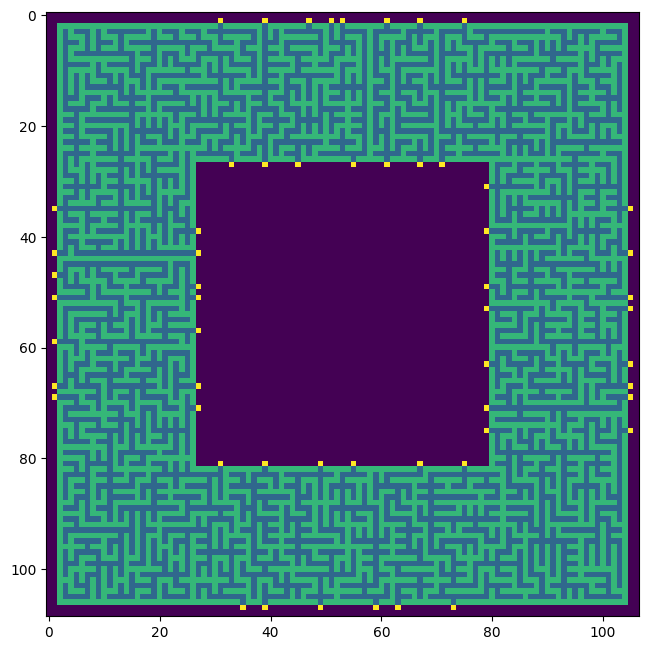

In [186]:
WALL    = 1
BORDER  = -1
EMPTY   = 0
PORTAL  = 2
VISITED = 3

def amaze2matrix(amaze):
    nrow = len(amaze)
    ncol = len(amaze[0])
    shape = (nrow,ncol)
    maze = np.zeros(shape)
    j = 0
    for l in amaze:
        i = 0
        for c in l:
            if c=='#':
                maze[j][i] = WALL
            elif c==' ':
                maze[j][i] = BORDER
            elif c=='.':
                maze[j][i] = EMPTY
            else:
                n = (i,j)
                if n in Plink.keys():
                    maze[j][i] = PORTAL
                elif n==start or n==exit:
                    maze[j][i] = PORTAL
                else:
                    maze[j][i] = BORDER
            i+=1
        j+=1
    return maze

maze = amaze2matrix(amaze)
fig = plt.figure(figsize=(8,8), dpi=100)
plt.imshow(maze)

In [187]:
def getAdjacent(n):
    '''returns list of adiacent cells'''
    x,y = n
    return [(x-1,y), # W
            (x,y-1), # N
            (x+1,y), # E
            (x,y+1)] # S

def getAdjacentPortal(n):
    '''returns list of adiacent cells accounting for portals'''
    x,y = n
    temp = [(x-1,y), (x,y-1), (x+1,y), (x,y+1)] 
    adjacent = []
    for c in temp:
        if c in Plink.keys():
            for cc in getAdjacent(Plink[c]):
                xx,yy = cc
                if maze[yy][xx] == WALL or maze[yy][xx] == BORDER:
                    continue
                else:
                    adjacent.append(cc)
        else:
            adjacent.append(c)
    return adjacent

def BFSPortal(start, end, theMaze):
    '''Find shorter path between two position in the maze using BFS algorithm'''
    maze = np.copy(theMaze)
    queue = Queue()
    queue.put([start])
    lenmax = 1
    while not queue.empty():
        path = queue.get() 
        c = path[-1] 
        if c == end:
            return path
        for a in getAdjacentPortal(c): 
            x,y = a
            if maze[y][x] == WALL or maze[y][x] == BORDER or maze[y][x] == VISITED: 
                continue
            else:
                maze[y][x] = VISITED
                new_path = list(path)
                new_path.append(a)
                queue.put(new_path) 
    return []
    
def drawPath(path,theMaze):
    maze = list(theMaze)
    for c in path:
        x,y = c
        maze[y][x] = VISITED
    return maze

In [202]:
path = BFSPortal(theStart, theExit, maze)
#print(path)
print("Steps needed = ",len(path)-1) # remove 1 to account for starting tile, according to instructions

Steps needed =  77


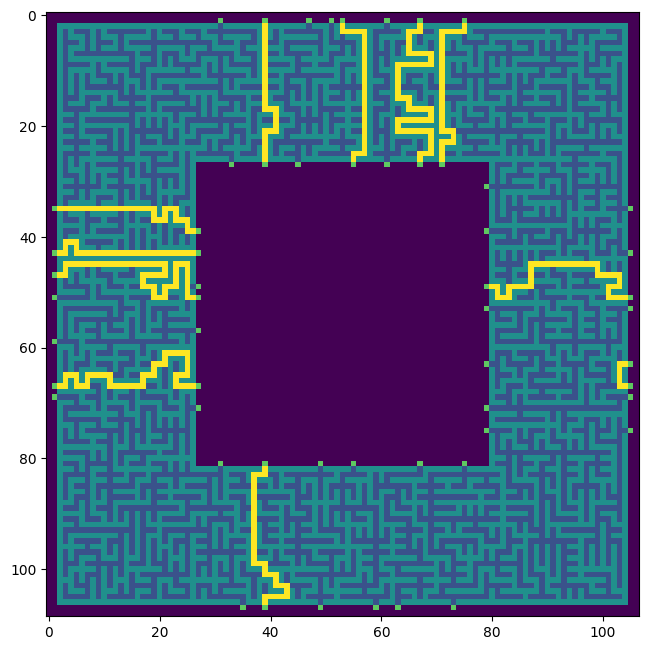

In [189]:
mazepath = drawPath(path,maze)
fig = plt.figure(figsize=(8,8), dpi=100)
plt.imshow(mazepath)

# Part 2

Mapping position as (i,x,y) where i = level

In [301]:
#inputfile = "./data/day20test1.txt"
inputfile = "./data/day20test3.txt"
#inputfile = "./data/input20.txt"

with open(inputfile) as f:
    amaze = [l.rstrip('\n') for l in f]

In [302]:
def isExternal(p):
    nrow = len(amaze)
    ncol = len(amaze[0])
    x,y = p
    if x==1 or x==ncol-2 or y==1 or y==nrow-2: 
        return True
    else:
        return False

def closeExternal(maze,P):
    '''Close external exits. Use on level 0'''
    for p in P.keys():
        for i in P[p]:
            if isExternal(i):
                x,y = i
                maze[y][x] = WALL

def fillPortalLevels(P,nlevel):
    '''Fill en extended dictionary of portal coordinates accounting for multiple levels'''
    PlinkLevel = {}
    for i in range(nlevel-1):
        for p in P:
            IN  = P[p][0]
            OUT = P[p][1]
            x1,y1 = IN
            x2,y2 = OUT
            order = []
            if isExternal(IN):
                order = [(i,x2,y2),(i+1,x1,y1)]
            else:
                order = [(i,x1,y1),(i+1,x2,y2)]
            PlinkLevel[order[0]] = order[1]
            PlinkLevel[order[1]] = order[0]
    return PlinkLevel

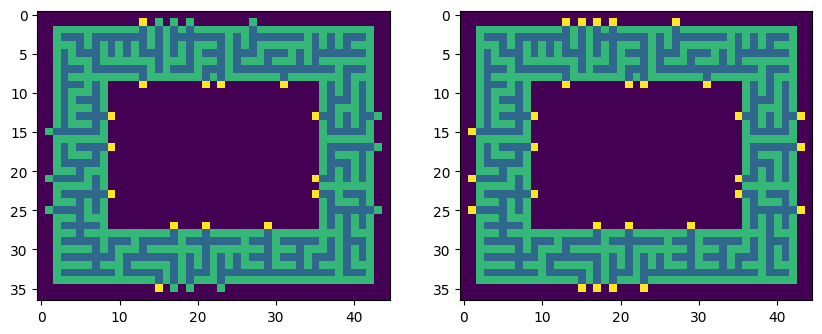

In [325]:
start, exit, P, Plink = findPortals(amaze)
theStart = findWalkable(start,amaze)
theExit = findWalkable(exit,amaze)

maze = amaze2matrix(amaze)

mazes = []

nmaze = 20

for i in range(nmaze):
    mazes.append(np.copy(maze))
    
closeExternal(mazes[0],P)

fig = plt.figure(figsize=(10,5), dpi=100)
plt.subplot(1,2,1)
plt.imshow(mazes[0])
plt.subplot(1,2,2)
plt.imshow(mazes[1])

PlinkLevels = fillPortalLevels(P,nmaze)

In [308]:
import copy

def getAdjacentLevel(n):
    i,x,y = n
    return [(i,x-1,y), # W
            (i,x,y-1), # N
            (i,x+1,y), # E
            (i,x,y+1)] # S

def getAdjacentPortalLevel(n):
    temp = getAdjacentLevel(n)
    adjacent = []
    for c in temp:
        if c in PlinkLevels.keys():
            for cc in getAdjacentLevel(PlinkLevels[c]):
                j,xx,yy = cc
                adjacent.append(cc)
        else:
            adjacent.append(c)
    return adjacent

def BFSPortalLevel(start, end, theMazes):
    mazes = copy.deepcopy(theMazes)
    queue = Queue()
    queue.put([start])

    istep = 0 

    while not queue.empty():
        
        #npath = queue.qsize()
        
        path = queue.get()
        c = path[-1]
        
        #istep += 1
        #if istep%100==0:
        #    ic,xc,yc = c
        #    print(npath,end=" ")     
        
        if c == end:
            print("EXIT found!")
            return path
        for a in getAdjacentPortalLevel(c): 
            i,x,y = a
            maze = mazes[i]
            if maze[y][x] == WALL or maze[y][x] == BORDER or maze[y][x] == VISITED: 
                continue
            else:
                maze[y][x] = VISITED
                new_path = list(path)
                new_path.append(a)
                queue.put(new_path)
    print("No path to EXIT found")
    return []

In [309]:
xs, ys = theStart
theStartLevel = (0,xs,ys)
xe, ye = theExit
theExitLevel = (0,xe,ye)

In [310]:
path = BFSPortalLevel(theStartLevel,theExitLevel,mazes)

EXIT found!


In [311]:
print(len(path)-1)

396


In [312]:
print(path)

[(0, 15, 34), (0, 15, 33), (0, 14, 33), (0, 13, 33), (0, 12, 33), (0, 11, 33), (0, 11, 32), (0, 11, 31), (0, 12, 31), (0, 13, 31), (0, 13, 30), (0, 13, 29), (0, 14, 29), (0, 15, 29), (0, 16, 29), (0, 17, 29), (0, 17, 28), (1, 2, 21), (1, 3, 21), (1, 4, 21), (1, 5, 21), (1, 5, 20), (1, 5, 19), (1, 6, 19), (1, 7, 19), (1, 7, 18), (1, 7, 17), (1, 8, 17), (2, 27, 2), (2, 27, 3), (2, 27, 4), (2, 27, 5), (2, 26, 5), (2, 25, 5), (2, 25, 6), (2, 25, 7), (2, 26, 7), (2, 27, 7), (2, 28, 7), (2, 29, 7), (2, 30, 7), (2, 31, 7), (2, 31, 8), (3, 42, 13), (3, 41, 13), (3, 41, 14), (3, 41, 15), (3, 40, 15), (3, 39, 15), (3, 38, 15), (3, 37, 15), (3, 37, 14), (3, 37, 13), (3, 36, 13), (4, 19, 2), (4, 19, 3), (4, 20, 3), (4, 21, 3), (4, 22, 3), (4, 23, 3), (4, 23, 4), (4, 23, 5), (4, 23, 6), (4, 23, 7), (4, 23, 8), (5, 42, 17), (5, 41, 17), (5, 40, 17), (5, 39, 17), (5, 38, 17), (5, 37, 17), (5, 37, 18), (5, 37, 19), (5, 37, 20), (5, 37, 21), (5, 36, 21), (6, 42, 25), (6, 41, 25), (6, 40, 25), (6, 39, 2

In [313]:
def drawPathLevel(path,theMazes):
    mazes = copy.deepcopy(theMazes)
    for c in path:
        i,x,y = c
        maze = mazes[i]
        maze[y][x] = VISITED
    return mazes

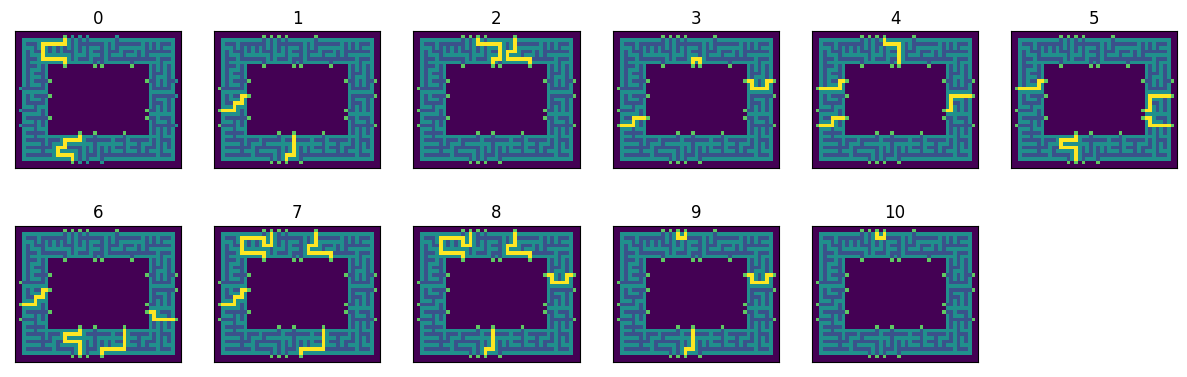

In [324]:
mazespath = drawPathLevel(path,mazes)

fig = plt.figure(figsize=(15,15), dpi=100)

for i in range(nmaze):
    if mazespath[i][mazespath[i]==VISITED].sum()>0:
        plt.subplot(6,6,i+1)
        f = plt.imshow(mazespath[i])
        f.axes.set_title(str(i))
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)